In [1]:
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses

print(tf.__version__)
print(tf.keras.__version__)

1.12.0
2.1.6-tf


In [2]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [3]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [4]:
type(conv_base)

tensorflow.python.keras.engine.training.Model

In [5]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
print("# of trainable oparameters: ", len(model.trainable_weights))

# of trainable oparameters:  30


In [9]:
conv_base.trainable = False

In [10]:
print("# of trainable oparameters: ", len(model.trainable_weights))

# of trainable oparameters:  4


In [11]:
train_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/train'
validation_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/validation'

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30


/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expect

 - 34s - loss: 0.5711 - acc: 0.7070 - val_loss: 0.4489 - val_acc: 0.8220
Epoch 2/30
 - 26s - loss: 0.4825 - acc: 0.7795 - val_loss: 0.3638 - val_acc: 0.8620
Epoch 3/30
 - 25s - loss: 0.4349 - acc: 0.8090 - val_loss: 0.3270 - val_acc: 0.8720
Epoch 4/30
 - 26s - loss: 0.4069 - acc: 0.8125 - val_loss: 0.3180 - val_acc: 0.8690
Epoch 5/30
 - 25s - loss: 0.3713 - acc: 0.8450 - val_loss: 0.2899 - val_acc: 0.8800
Epoch 6/30
 - 26s - loss: 0.3620 - acc: 0.8530 - val_loss: 0.2963 - val_acc: 0.8800
Epoch 7/30
 - 25s - loss: 0.3657 - acc: 0.8440 - val_loss: 0.2736 - val_acc: 0.8880
Epoch 8/30
 - 25s - loss: 0.3487 - acc: 0.8455 - val_loss: 0.2651 - val_acc: 0.8950
Epoch 9/30
 - 26s - loss: 0.3400 - acc: 0.8580 - val_loss: 0.2661 - val_acc: 0.8940
Epoch 10/30
 - 25s - loss: 0.3196 - acc: 0.8555 - val_loss: 0.2611 - val_acc: 0.8940
Epoch 11/30
 - 25s - loss: 0.3284 - acc: 0.8540 - val_loss: 0.2558 - val_acc: 0.8930
Epoch 12/30
 - 26s - loss: 0.3196 - acc: 0.8660 - val_loss: 0.2573 - val_acc: 0.8950


In [14]:
model.save('cats_and_dogs_small_3.h5')

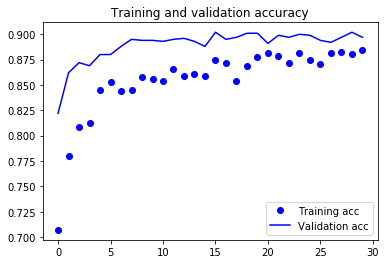

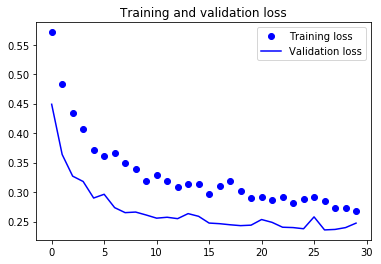

In [17]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [18]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [19]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100
 98/100 [============================>.] - ETA: 0s - loss: 0.2822 - acc: 0.8806

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6553600 bytes but only got 0. Skipping tag 49
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1050744 bytes but only got 4951. Skipping tag 51
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 293339136 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expect

 99/100 [============================>.] - ETA: 0s - loss: 0.2843 - acc: 0.8793

/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404094976 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 404619264 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 425459712 bytes but only got 0. Skipping tag 4
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1385474 bytes but only got 6833. Skipping tag 513
  " Skipping tag %s" % (size, len(data), tag))
/usr/local/lib/python3.5/dist-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expe

100/100 [==============================] - 28s 282ms/step - loss: 0.2849 - acc: 0.8790 - val_loss: 0.3135 - val_acc: 0.8720
Epoch 2/100
100/100 [==============================] - 27s 266ms/step - loss: 0.2582 - acc: 0.8885 - val_loss: 0.2405 - val_acc: 0.9050
Epoch 3/100
100/100 [==============================] - 25s 254ms/step - loss: 0.2379 - acc: 0.9015 - val_loss: 0.2333 - val_acc: 0.9070
Epoch 4/100
100/100 [==============================] - 26s 264ms/step - loss: 0.2236 - acc: 0.9050 - val_loss: 0.2125 - val_acc: 0.9140
Epoch 5/100
100/100 [==============================] - 26s 255ms/step - loss: 0.2016 - acc: 0.9125 - val_loss: 0.2125 - val_acc: 0.9120
Epoch 6/100
100/100 [==============================] - 25s 254ms/step - loss: 0.1916 - acc: 0.9200 - val_loss: 0.2258 - val_acc: 0.9080
Epoch 7/100
100/100 [==============================] - 26s 257ms/step - loss: 0.1715 - acc: 0.9260 - val_loss: 0.2694 - val_acc: 0.9050
Epoch 8/100
100/100 [==============================] - 25s 2

Epoch 61/100
100/100 [==============================] - 26s 256ms/step - loss: 0.0265 - acc: 0.9905 - val_loss: 0.2728 - val_acc: 0.9340
Epoch 62/100
100/100 [==============================] - 26s 257ms/step - loss: 0.0343 - acc: 0.9910 - val_loss: 0.2669 - val_acc: 0.9260
Epoch 63/100
100/100 [==============================] - 27s 267ms/step - loss: 0.0324 - acc: 0.9880 - val_loss: 0.2210 - val_acc: 0.9320
Epoch 64/100
100/100 [==============================] - 26s 258ms/step - loss: 0.0250 - acc: 0.9920 - val_loss: 0.2489 - val_acc: 0.9390
Epoch 65/100
100/100 [==============================] - 27s 265ms/step - loss: 0.0252 - acc: 0.9915 - val_loss: 0.2186 - val_acc: 0.9380
Epoch 66/100
100/100 [==============================] - 25s 255ms/step - loss: 0.0278 - acc: 0.9875 - val_loss: 0.2599 - val_acc: 0.9350
Epoch 67/100
100/100 [==============================] - 25s 254ms/step - loss: 0.0258 - acc: 0.9900 - val_loss: 0.2802 - val_acc: 0.9310
Epoch 68/100
100/100 [===================

In [21]:
model.save('cats_and_dogs_small_4.h5')

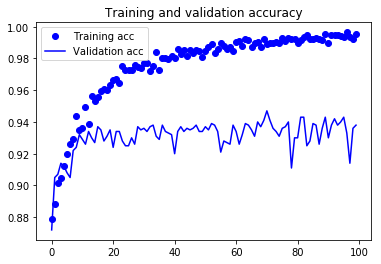

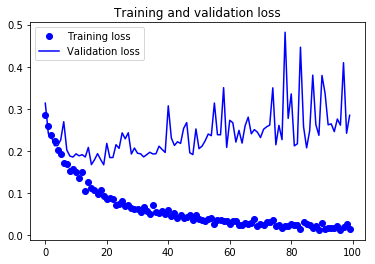

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

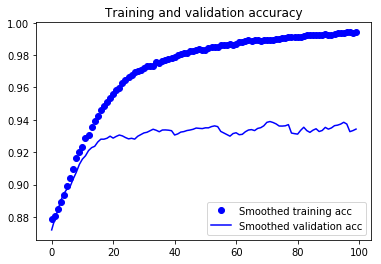

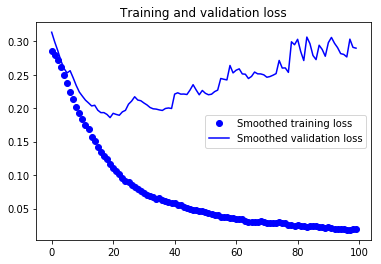

In [23]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [24]:
test_dir = '/notebooks/sharedfolder/work/data/cats_and_dogs_small/test'

In [25]:
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

Found 1000 images belonging to 2 classes.
test acc: 0.9349999916553497
